# 워드 클라우드(단어구름) 실습
### amueller의 wordcloud package를 이용한 mask를 활용한 wordcloud 만들기! [참고](https://github.com/kimyoungjin06/wordcloud/blob/master/Make_the_Word_Cloud.ipynb)

## 1. Package import & font, mask, message setup!

- 이 코드는 mask를 다루는 부분, font를 다루는 부분, word를 다루는 부분으로 나뉜다. 먼저 필요한 패키지들을 불러오는데, numpy와 random, palettable은 font 색 설정할 때, PIL은 mask 이미지를 처리할 때, wordcloud는 이 모든 것을 이용해서 word cloud를 그릴 때 이용된다.

- 아래에서 딱히 어려운 점은 없고, color_func가 여기서는 Dark2_8이라는 palette를 이용해서 색을 만들어낸다. Palette를 바꾸고 싶다면 이 부분을 바꾸면 될 것!

- *PIL은 python3에서는 Pillow로 설치하고 PIL로 사용하면 된다.

- *mask로 쓸 이미지는 png파일로 우리가 단어를 배치할 공간만 그림이 존재해야 한다. 나머지 공간엔 흰색이 아니라 아예 이미지가 없는 png파일이 필요하다.

In [1]:
## 오류가 나면 모듈을 설치해야 합니다.
## 아마도 아래와 같은 모듈 오류가 있을 겁니다.
# wordcloud 오류, palettable 오류
# 아래 명령어를 복사해서 anaconda prompt에서 수행하세요.
# conda install -c conda-forge wordcloud
# pip install palettable\

import numpy as np
import random
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from palettable.colorbrewer.qualitative import Dark2_8
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# color_func 함수, Dark2_8이라는 pallette를 이용하여 색을 만들어냄.
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple(Dark2_8.colors[random.randint(0,7)])

# 한글 폰트 지정
font = "NanumPen"
font_path = "%s.ttf" % font

# 아이콘 지정
icon = "Korea" 
icon_path = "%s.png" % icon

### 데이터 입력

In [3]:
# 연설문1
# 아래 KoreaSummit_Moon.txt를 본인이 저장한 파일 이름으로 바꾸세요.
#-*- coding: utf-8 -*-
f = open("yuna.txt", 'r', encoding='euc-kr')
yuna = f.read()
print(yuna)
f.close()

ICO위원회 Roggue님, IOC 회원님들 안녕하세요.
저와 스위스의 로젠에서 만나뵌지가 7주밖에 지나지 않았다는 게 믿겨지지 않습니다. 그 후로 저는 오늘을 위해 더 열심히 훈련해왔습니다.
로젠에서 있었을 때와 마찬가지로 심장이 떨리네요. 

이 모든 과정에 있어서 저와 비슷한 또래들은 모두 겸손해질 것이라고 생각합니다. 스스로 겸손해지는 이유는 바로 오늘 새로운 역사를 만드는 순간이 오늘이기 때문입니다.
그리고 저는 오늘 그 역사를 만드는데 작은 기여를 하기 때문입니다.  


저는 밴쿠버에서 경쟁했을때와 같은 느낌입니다.
10년 전 평창이 처음으로 동계올림픽 유치를 꿈꿔왔을 때 
저는 서울에서 아이스링크 위에서 저만의 꿈을 펼쳐오려고 노력했습니다.
그땐 저는 좋은 시설과 좋은 코치님들 사이에 있어서 운이 좋았던 것 같습니다.

다들 주지하시는 바와 같이 저는 많은 한국 동계올림픽 선수들이 훈련을 받고 
올림픽의 꿈을 이루기 위해 세계 각지를 돌고 있습니다. 그러나 이젠 저의 꿈은 제가 가졌던 기회들을 이런 선수들과 함께 새로운 곳에서 펼쳐보고 싶습니다.

평창 2018은 그 꿈을 이루게 해 줄 것입니다.
 

정부에서는 < 꿈을 향해 나아가라 > 라는 프로젝트를 만들어 동계올림픽 시설과

선수들 훈련비용을 위해 펀드를 조성했습니다. 이 프로그램 덕분에 한국은 밴쿠버에서 제 메달을 포함해 14개 메달을 땄고  우리는 82 개 국가들 중에서 7위를 거두었습니다.

앞으로 더 좋은 결과를 얻기 위해서 우리는 2018년 평창에 새로운 장소를

마련해야 한다고 생각합니다. 새로운 지평선이 떠오르고 이것은 유산으로 남을 것입니다. 이것은 아마  장소가 어디인 것인지 보다 더 중요할 것입니다.



저는 인류의 유산을 말하고 있습니다.
제 자신이 바로 한국의 동계스포츠의 질을 향상 시키는데 정부의 노력이 들어가있는 살아있는 유산이라고 말씀드리고 싶습니다. 
이젠 저도 깨달았습니다. 아마 제가 생각했던 그 이상으로, 승리라는 게 무엇인지 알게 되었습니다.

그것은 성

## 2. Load the mask, font coloring, generate word cloud!
- 먼저 icon에 image를 불러오고, mask를 RGB type으로 icon과 같은 사이즈로 전부 (255,255,255)값 (아마 흰색?)으로 만들어내고, 이 (255,255,255)가 이미지가 채워지지 않는 부분을 의미한다. (?Image.new를 참고!), 그리고 나서 이 mask에 아까 불러온 icon의 형상을 붙여넣는다. 그리고 나서 이를 nparray로 만든다.

- 이제 만들어놓은 mask와 불러놨던 font를 이용하여 WordCloud함수를 이용해 wordcloud를 만들어내고, WordCloud.recolor를 이용해서 아까 만들어놓은 color_func()를 사용해 불러온 palette를 이용해 색을 입힌다. 그리고 저장하면 끝!



# 남북정상회담 두 정상의 대화문 워드 클라우드
[연설문 시각화](https://github.com/eventia/CandSpeech/blob/master/wordcloud.py)

In [5]:
# 연설문 1번 전처리
yuna = yuna.split('\n\n')
yuna

['ICO위원회 Roggue님, IOC 회원님들 안녕하세요.\n저와 스위스의 로젠에서 만나뵌지가 7주밖에 지나지 않았다는 게 믿겨지지 않습니다. 그 후로 저는 오늘을 위해 더 열심히 훈련해왔습니다.\n로젠에서 있었을 때와 마찬가지로 심장이 떨리네요. ',
 '이 모든 과정에 있어서 저와 비슷한 또래들은 모두 겸손해질 것이라고 생각합니다. 스스로 겸손해지는 이유는 바로 오늘 새로운 역사를 만드는 순간이 오늘이기 때문입니다.\n그리고 저는 오늘 그 역사를 만드는데 작은 기여를 하기 때문입니다.  ',
 '\n저는 밴쿠버에서 경쟁했을때와 같은 느낌입니다.\n10년 전 평창이 처음으로 동계올림픽 유치를 꿈꿔왔을 때 \n저는 서울에서 아이스링크 위에서 저만의 꿈을 펼쳐오려고 노력했습니다.\n그땐 저는 좋은 시설과 좋은 코치님들 사이에 있어서 운이 좋았던 것 같습니다.',
 '다들 주지하시는 바와 같이 저는 많은 한국 동계올림픽 선수들이 훈련을 받고 \n올림픽의 꿈을 이루기 위해 세계 각지를 돌고 있습니다. 그러나 이젠 저의 꿈은 제가 가졌던 기회들을 이런 선수들과 함께 새로운 곳에서 펼쳐보고 싶습니다.',
 '평창 2018은 그 꿈을 이루게 해 줄 것입니다.\n ',
 '정부에서는 < 꿈을 향해 나아가라 > 라는 프로젝트를 만들어 동계올림픽 시설과',
 '선수들 훈련비용을 위해 펀드를 조성했습니다. 이 프로그램 덕분에 한국은 밴쿠버에서 제 메달을 포함해 14개 메달을 땄고  우리는 82 개 국가들 중에서 7위를 거두었습니다.',
 '앞으로 더 좋은 결과를 얻기 위해서 우리는 2018년 평창에 새로운 장소를',
 '마련해야 한다고 생각합니다. 새로운 지평선이 떠오르고 이것은 유산으로 남을 것입니다. 이것은 아마  장소가 어디인 것인지 보다 더 중요할 것입니다.',
 '',
 '저는 인류의 유산을 말하고 있습니다.\n제 자신이 바로 한국의 동계스포츠의 질을 향상 시키는데 정부의 노력이 들어가있는 살아있는 유산이라고 말씀드리고 싶습니다. \n이젠 저도 깨달았습니다. 아마 제

In [7]:
# 연설문 1번 빈도 계산
# except 1-letter word
## min_df: integer(frequency), float(ratio)
tf_vectorizer = CountVectorizer(min_df = 0.001, token_pattern=r'\w{2,}')

tf_corpus1 = tf_vectorizer.fit(yuna)
tf_bow1 = tf_vectorizer.fit_transform(yuna)
tf_bow1

<13x212 sparse matrix of type '<class 'numpy.int64'>'
	with 248 stored elements in Compressed Sparse Row format>

In [9]:
# 연설문 1 
# check vocabulary in TDM
print(len(tf_corpus1.vocabulary_))
print(len(tf_corpus1.get_feature_names()))
tf_vectorizer.get_feature_names()

212
212


['10살',
 '123년',
 '15',
 '2018',
 '2018이',
 '2회',
 '72',
 'un총회와',
 'un총회의',
 '가장',
 '가진',
 '감사의',
 '감사합니다',
 '같은',
 '같이',
 '개인적인',
 '걸어',
 '겁니다',
 '것은',
 '것을',
 '것이라고',
 '결의안',
 '겸허히',
 '경기로',
 '경기장에',
 '경험을',
 '경험한',
 '계속적으로',
 '곳일',
 '국가나',
 '국경을',
 '국제',
 '굳건히',
 '굳게',
 '귀감이',
 '그리고',
 '기대하겠습니다',
 '기회를',
 '나누고자',
 '나아가려는',
 '나타낸다고',
 '남북한',
 '남북한의',
 '내년에',
 '너머',
 '노력을',
 '다가오는',
 '다시금',
 '다할',
 '대사로서',
 '대사이자',
 '대표단이',
 '대표하는',
 '대해',
 '데에',
 '동계',
 '되도록',
 '들어오는',
 '때입니다',
 '라고',
 '마음가짐으로',
 '말씀을',
 '메시지를',
 '명예',
 '모든',
 '모으는',
 '목표가',
 '믿습니다',
 '바로',
 '발전시키는',
 '벽을',
 '보고자',
 '봤을',
 '뵙길',
 '부탁드립니다',
 '사람들을',
 '사회로',
 '새기고',
 '서서',
 '선수',
 '성공적인',
 '세계',
 '세계에서',
 '세계와',
 '세계의',
 '세대의',
 '세우는',
 '스포츠',
 '스포츠가',
 '스포츠의',
 '신념의',
 '싶습니다',
 '쓰여',
 '아니다',
 '아님을',
 '아버지인',
 '안녕하십니까',
 '안되는',
 '알리기',
 '알릴',
 '약속하려',
 '어떤',
 '언어를',
 '언어와',
 '얼어붙은',
 '여러분',
 '여러분께',
 '여러분의',
 '역대',
 '역할이자',
 '연설할',
 '오늘',
 '올림픽',
 '올림픽과',
 '올림픽과패럴림픽이',
 '올림픽은',
 '올림픽의',
 '우리는',
 '운동에',
 '위하여',
 '위한',


In [11]:
# 연설문 1
# frequency count
tf_word_sum1 = tf_bow1.toarray().sum(axis=0)
tf_word_name1 = tf_corpus1.get_feature_names()
tf_word_dict1 = {}

for i in range(len(tf_word_sum1)):
    tf_word_dict1[tf_word_name1[i]] = tf_word_sum1[i]
    
print(tf_corpus1.get_feature_names())
tf_word_sum1

['10년', '14개', '2018년', '2018은', '7위를', '7주밖에', '82', 'ico위원회', 'ioc', 'roggue님', '가능성이라는', '가졌던', '각지를', '감사하다는', '감사합니다', '같습니다', '같은', '같이', '개인적인', '거두었습니다', '거의', '것이라고', '것인지', '것입니다', '결과를', '겸손해지는', '겸손해질', '경우는', '경쟁했을때와', '곳에서', '과정에', '국가들', '그것은', '그것이야', '그땐', '그러나', '그리고', '기여를', '기회들을', '기회를', '깨달았습니다', '꿈꿔왔을', '꿈은', '꿈을', '나아가라', '남을', '노력이', '노력했습니다', '느낌입니다', '다들', '다른', '덕분에', '돌고', '동계스포츠의', '동계올림픽', '되었습니다', '드립니다', '들어가있는', '땄고', '때문입니다', '때와', '떠오르고', '떨리네요', '또래들은', '라는', '로젠에서', '마땅한', '마련해야', '마지막으로', '마찬가지로', '만나뵌지가', '만드는', '만드는데', '만들어', '많은', '말로', '말씀드리고', '말씀드리는', '말씀을', '말하고', '메달을', '모두', '모든', '목표달성을', '무엇인지', '믿겨지지', '바로', '바와', '받고', '받아', '밴쿠버에서', '보다', '비슷한', '빌어서', '사이에', '살아있는', '새로운', '생각합니다', '생각했던', '서울에서', '선수가', '선수들', '선수들과', '선수들이', '성공과', '세계', '세계에', '순간이', '스스로', '스위스의', '승리라는', '시설과', '시키는데', '심장이', '싶습니다', '아마', '아이스링크', '안녕하세요', '않습니다', '않았다는', '알게', '앞에서', '앞으로', '어디인', '어린이들이', '얻기', '없습니다', '역사를', '열심히', '오늘', '오늘을', '오늘이기', '올림픽

array([1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 4, 1, 1, 1, 2, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1,
       1, 1, 2, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1], dtype=int64)

In [13]:
# 연설문 1
# 단어별 글자수 확인
tf_word_dict1

{'10년': 1,
 '14개': 1,
 '2018년': 1,
 '2018은': 1,
 '7위를': 1,
 '7주밖에': 1,
 '82': 1,
 'ico위원회': 1,
 'ioc': 3,
 'roggue님': 1,
 '가능성이라는': 1,
 '가졌던': 1,
 '각지를': 1,
 '감사하다는': 2,
 '감사합니다': 1,
 '같습니다': 1,
 '같은': 1,
 '같이': 1,
 '개인적인': 1,
 '거두었습니다': 1,
 '거의': 1,
 '것이라고': 2,
 '것인지': 1,
 '것입니다': 4,
 '결과를': 1,
 '겸손해지는': 1,
 '겸손해질': 1,
 '경우는': 1,
 '경쟁했을때와': 1,
 '곳에서': 1,
 '과정에': 1,
 '국가들': 1,
 '그것은': 1,
 '그것이야': 1,
 '그땐': 1,
 '그러나': 1,
 '그리고': 1,
 '기여를': 1,
 '기회들을': 1,
 '기회를': 1,
 '깨달았습니다': 1,
 '꿈꿔왔을': 1,
 '꿈은': 1,
 '꿈을': 5,
 '나아가라': 1,
 '남을': 1,
 '노력이': 1,
 '노력했습니다': 1,
 '느낌입니다': 1,
 '다들': 1,
 '다른': 1,
 '덕분에': 1,
 '돌고': 1,
 '동계스포츠의': 1,
 '동계올림픽': 3,
 '되었습니다': 1,
 '드립니다': 1,
 '들어가있는': 1,
 '땄고': 1,
 '때문입니다': 2,
 '때와': 1,
 '떠오르고': 1,
 '떨리네요': 1,
 '또래들은': 1,
 '라는': 1,
 '로젠에서': 2,
 '마땅한': 1,
 '마련해야': 1,
 '마지막으로': 1,
 '마찬가지로': 1,
 '만나뵌지가': 1,
 '만드는': 1,
 '만드는데': 1,
 '만들어': 1,
 '많은': 1,
 '말로': 1,
 '말씀드리고': 1,
 '말씀드리는': 1,
 '말씀을': 2,
 '말하고': 1,
 '메달을': 2,
 '모두': 1,
 '모든': 4,
 '목표달성을': 1,
 '무엇인지': 1,
 '믿겨지지':

### 시각화

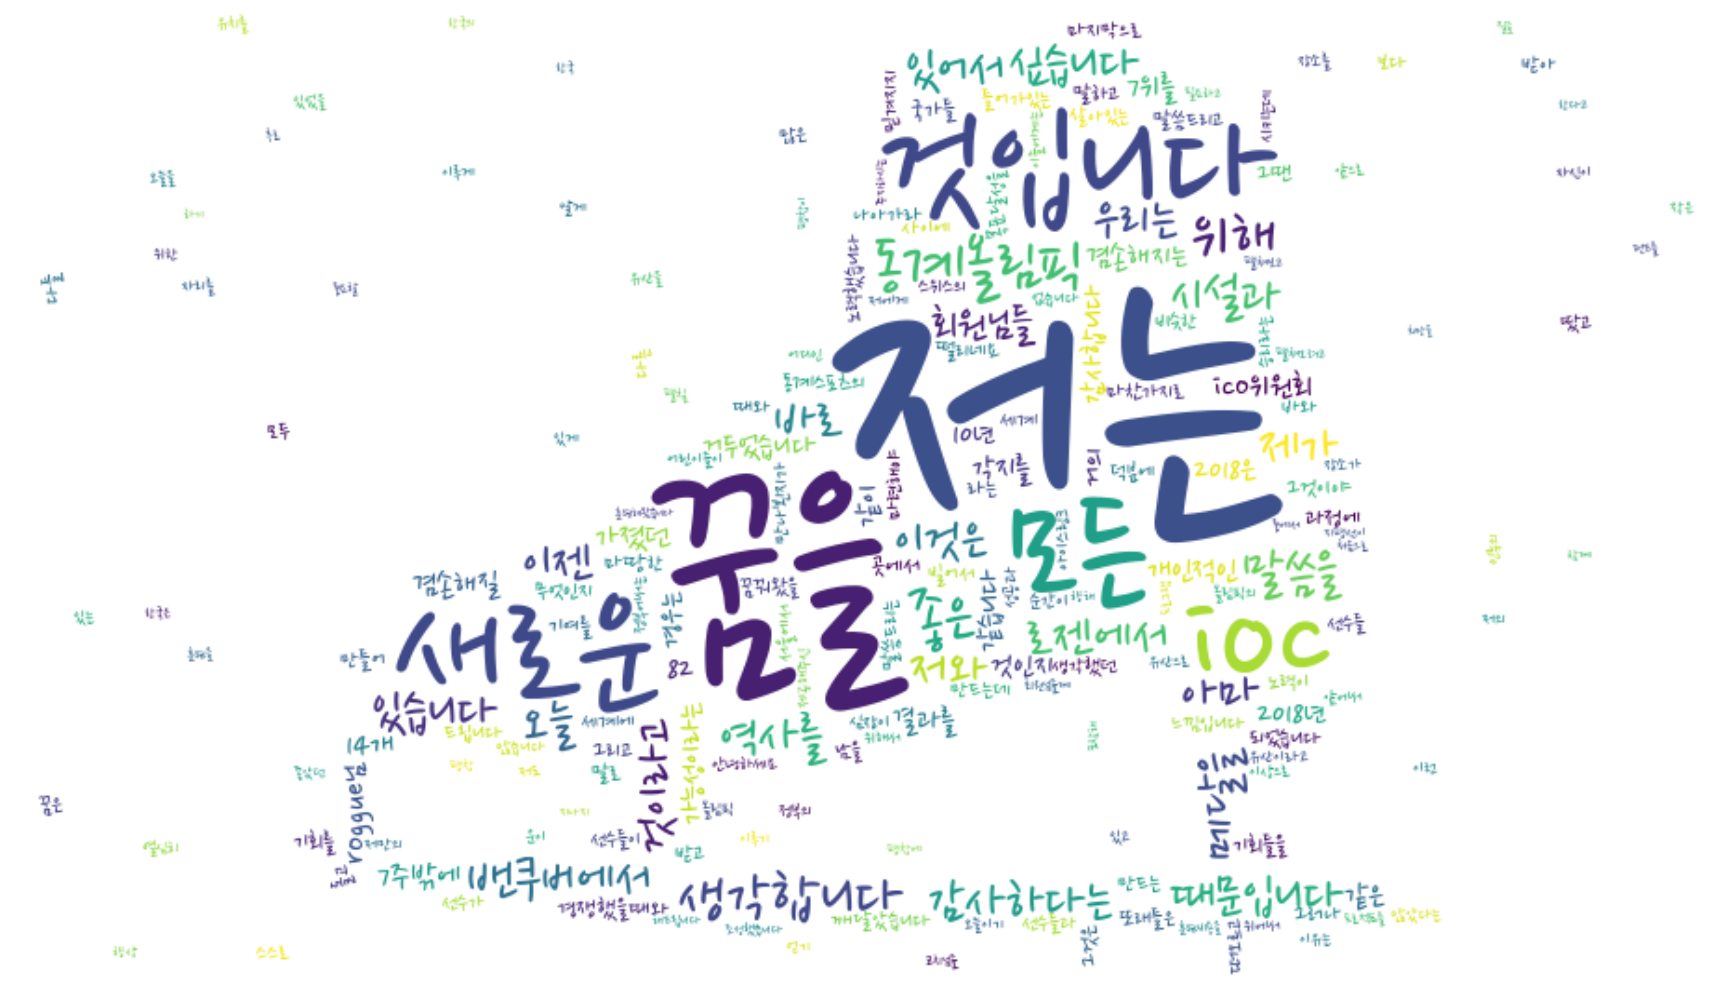

In [17]:
# 연설문 1
icon = Image.open(icon_path).convert("RGBA")
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

wc = WordCloud(font_path=font_path, background_color="white", max_words=2000, mask=mask,
               max_font_size=300, random_state=42).generate_from_frequencies(tf_word_dict1)

plt.figure(figsize=(30, 90))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
wc.to_file("Korea.png") # 그림파일로 추출하기